In [1]:
# 1. Importing Python Modules/Libraries.
import pandas as pd

In [2]:
# 2. Importing data.
df = pd.read_csv("datasets/diabetes.csv")

In [3]:
# 3. Displaying data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# 5. Replacing missing value with meaningful value.
df.fillna(df.mean(numeric_only=True), inplace=True)

In [6]:
# 4. Creating the Independent and Dependent variables.
X = df.iloc[:, :-1]  # All columns except the last one (features)
y = df.iloc[:, -1]   # Last column (target/species)

In [7]:
from sklearn.model_selection import train_test_split

# 6. Splitting the data into training and test set

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 614
Test set size: 154


In [8]:
# 7. Doing feature scaling on data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling complete.")
print(f"Scaled training set mean (approx 0): {X_train_scaled.mean(axis=0).round(2)}")
print(f"Scaled training set std  (approx 1): {X_train_scaled.std(axis=0).round(2)}")

Feature scaling complete.
Scaled training set mean (approx 0): [ 0. -0.  0.  0. -0. -0.  0. -0.]
Scaled training set std  (approx 1): [1. 1. 1. 1. 1. 1. 1. 1.]


Feature Importances:
Glucose                     0.258864
BMI                         0.169984
Age                         0.140931
DiabetesPedigreeFunction    0.123768
BloodPressure               0.088134
Pregnancies                 0.076551
Insulin                     0.076122
SkinThickness               0.065646
dtype: float64

Most significant feature: Glucose


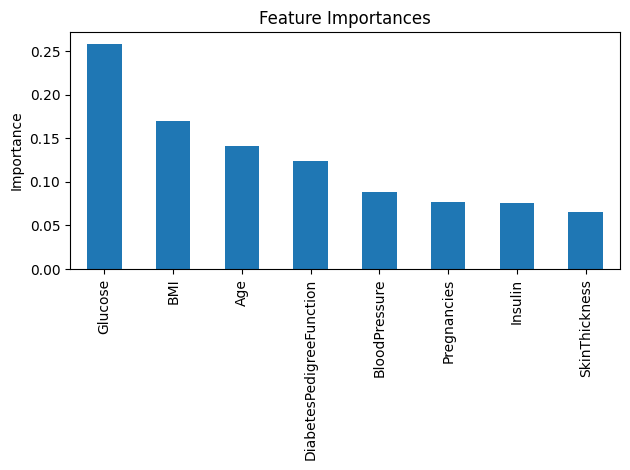

In [9]:
# 8. Finding Feature Importance and Most Significant Features
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("Feature Importances:")
print(feature_importances)
print(f"\nMost significant feature: {feature_importances.index[0]}")

# Plot feature importances
feature_importances.plot(kind='bar', title='Feature Importances')
import matplotlib.pyplot as plt
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [10]:
# 9. Creating Classifier Objects
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

print("Classifiers created:")
for name in classifiers:
    print(f"  - {name}")

Classifiers created:
  - Logistic Regression
  - Decision Tree
  - Random Forest
  - SVM
  - KNN
  - Naive Bayes


In [11]:
# 10. Training the Classifiers
results = {}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    train_acc = clf.score(X_train_scaled, y_train)
    test_acc = clf.score(X_test_scaled, y_test)
    results[name] = {"train_acc": train_acc, "test_acc": test_acc}
    print(f"{name:25s} -> Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Logistic Regression       -> Train Accuracy: 0.7704, Test Accuracy: 0.7532
Decision Tree             -> Train Accuracy: 1.0000, Test Accuracy: 0.7468
Random Forest             -> Train Accuracy: 1.0000, Test Accuracy: 0.7208
SVM                       -> Train Accuracy: 0.8339, Test Accuracy: 0.7338
KNN                       -> Train Accuracy: 0.8241, Test Accuracy: 0.6948
Naive Bayes               -> Train Accuracy: 0.7524, Test Accuracy: 0.7662



Classifier: Logistic Regression
              precision    recall  f1-score   support

 No Diabetes       0.81      0.80      0.81        99
    Diabetes       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Classifier: Decision Tree
              precision    recall  f1-score   support

 No Diabetes       0.83      0.76      0.79        99
    Diabetes       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Classifier: Random Forest
              precision    recall  f1-score   support

 No Diabetes       0.79      0.78      0.78        99
    Diabetes       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.

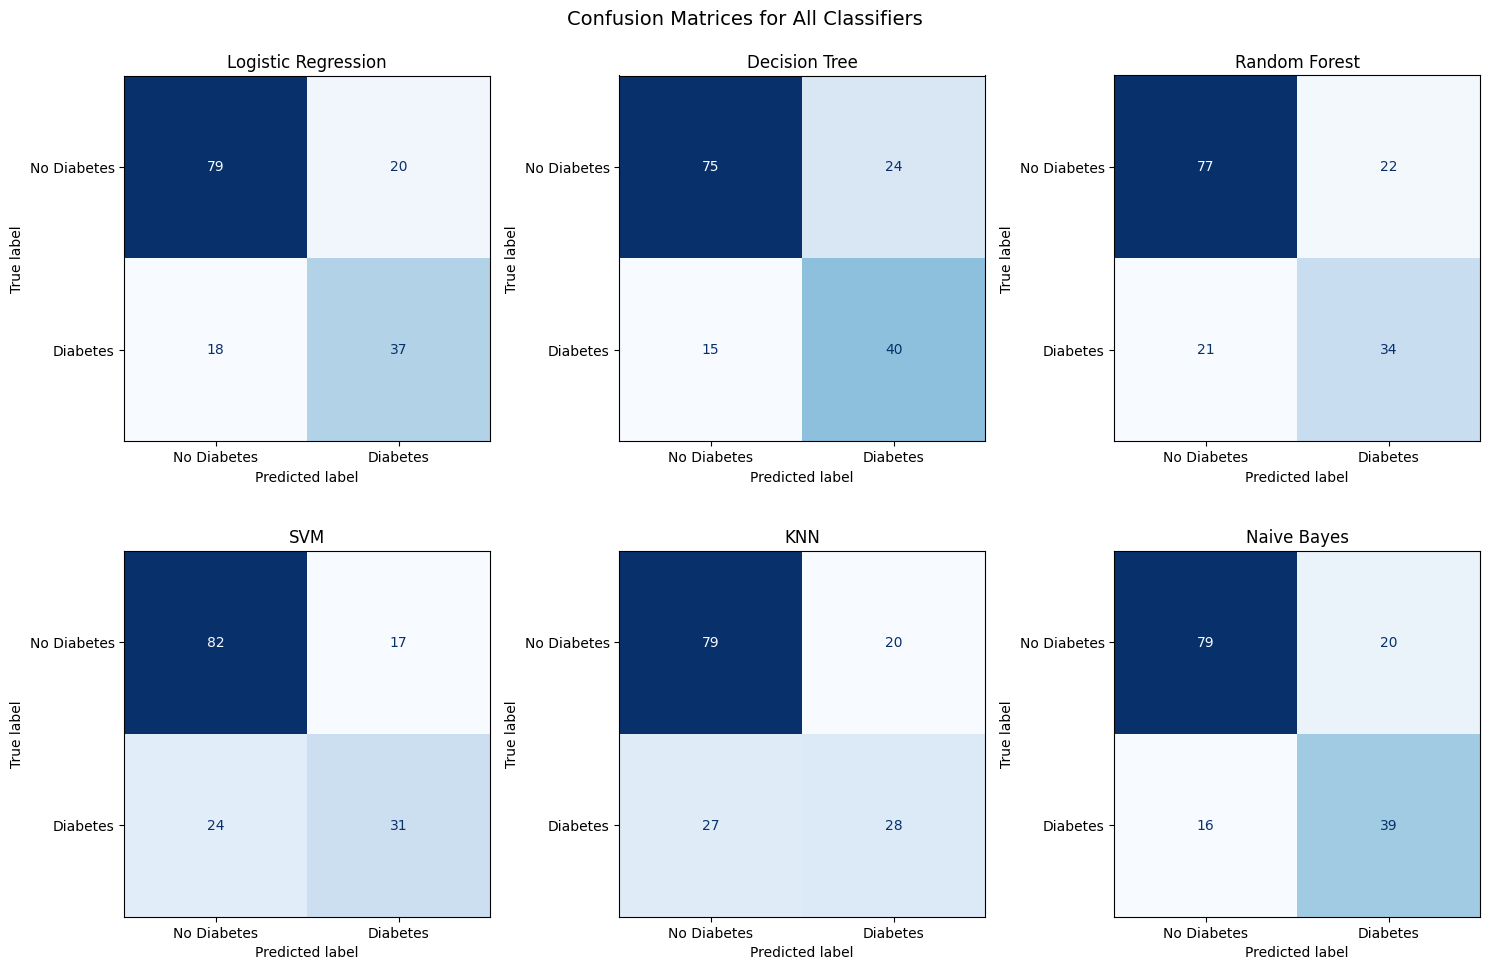

In [12]:
# 11. Analyzing Performance of Classifiers
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (name, clf) in enumerate(classifiers.items()):
    y_pred = clf.predict(X_test_scaled)

    print(f"\n{'='*50}")
    print(f"Classifier: {name}")
    print(f"{'='*50}")
    print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(name)

plt.suptitle("Confusion Matrices for All Classifiers", fontsize=14)
plt.tight_layout()
plt.show()